# Importing ExtremeLy and loading an univariate dataset.

In [1]:
#Importing required libraries
import pandas as pd
from ExtremeLy import extremely as ely #importing ExtremeLy

In [2]:
#Hiding all the warnings
import warnings
warnings.filterwarnings('ignore')

I am using the Danish Univariate dataset for the examples. This dataset was collected at Copenhagen Reinsurance and it comprises of 2167 fire losses over the period of 1980 to 1990. The losses are expressed in millions of Danish Krone. There are two columns : Date and Loss.

In [3]:
#Reading the Danish Univariate dataset.
data = pd.read_csv("/home/msc2/Desktop/Project/Learning Concepts/danishuni.csv",index_col=0)
data.head()

,Date,Loss
1,1980-01-03,1.683748
2,1980-01-04,2.093704
3,1980-01-05,1.732581
4,1980-01-07,1.779754
5,1980-01-07,4.612006


In [4]:
#Basic info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 1 to 2167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2167 non-null   object 
 1   Loss    2167 non-null   float64
dtypes: float64(1), object(1)
memory usage: 50.8+ KB


The dataset does not contain any null values. The column Date is an object type and the column Loss is a float type.

In [5]:
#5 point summary of the data
data.describe()

,Loss
count,2167.000000
mean,3.385088
std,8.507452
min,1.000000
25%,1.321119
50%,1.778154
75%,2.967023
max,263.250366


As we can see the minimum loss is 1 million Krone whereas maximum loss is of 263.25 million Krone. One interesting thing to observe is that the mean is just 3.38 million Krone which means there are few large claims.

# Generalized Extreme Value (GEV) Distribution

For all the functions of ExtremeLy that take sample as input, we are supposed to send a pandas dataframe with first column as Date column and second columns is of losses or observed values of our interest.

#### Block Maxima Method

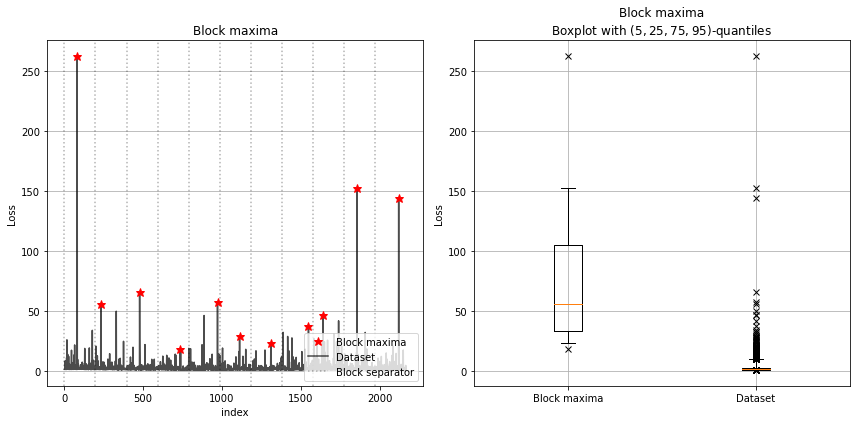

,Date,Loss
0,1980-12-31,263.250366
1,1981-12-31,56.225426
2,1982-12-31,65.707491
3,1983-12-30,13.348165
4,1984-12-31,19.162304
5,1985-12-29,57.410636
6,1986-12-30,29.026037
7,1987-12-31,32.467532
8,1988-12-26,47.019521
9,1989-12-31,152.413209


In [4]:
#Here Y means Yearly, we can pass M for monthly, W for weekly and D for daily.
maxima=ely.getBM(sample=data,period="Y") 
maxima

We are looking at yearly maxima values which means for each year we are selecting the largest loss as the extreme value. Since there are 11 years, we get 11 extreme values. In the left plot, all the datapoints with a star on their tips are extreme values. We can see that some extreme values in a block are actually smaller than some non-extreme values in another block. In the right we have a boxplot comparing the original dataset and the extreme values. For the original dataset the median is almost close to 0 whereas the median for extreme values is 57.4. All the datapoints marked by 'x' are outliers.

#### GEV Fit
Now we can fit the maxima value to GEV distribution for estimating parameters. Here the default fit_method is MLE and default Confidence interval method is delta. Method of moments also can be used as a fit_method and bootstrap also can be used for ci_method.

In [5]:
#Fitting the GEV distribution with maxima values. 
fit=ely.gevfit(sample=maxima,fit_method="mle",ci=0,ci_method="delta")

#Getting estimated distribution parameters for GEV fit.
params=ely.gevparams(model=fit)
params

OrderedDict([('shape', -0.6384049125307144),
             ('location', 37.79353853187126),
             ('scale', 28.93607752286071)])

we have estimated the parameters. The negative shape parameter value indicates that the resulting distribution is a Weibull distribution, also called as Type III Extreme Value distribution.

#### Summary plots


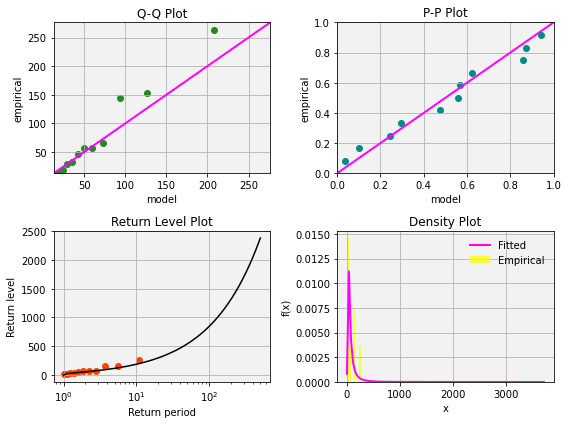

In [6]:
#Summarizing the GEV model.
ely.gevsummary(model=fit)

#### QQplot
QQplot is a plot of the quantiles of the first dataset to the quantiles of the second dataset. A 45 degree reference is plotted, if the two sets come from a population with the same distribution, the points should fall approximately along this reference line. In the above QQplot, the extreme values are being plotted against the theoritical exponential values. Since most of the points lie on the reference line we can conclude that the extreme values follow Exponential distribution. The three points which are far from the reference line are considered outliers.

#### PPplot
PPplot is used for assessing how closely two datasets agree. It plots the cumulative distribution functions against each other. In the above PPplot, the estimated probabilities of the extreme values is plotted against the probabilities of theoritical exponential values. Since most of the points lie on or near the reference line we can conclude that the probabilities follow exponential distribution.

#### Return Level plot
Return level plot also summarizes the fitted model. Return level vs return period is plotted here. Return level is associated with return period and indicates the level the maxima can reach within such a return period. In the above return level plot, we can see that the maxima is close to 0 million for 1 year, more than 250 million for 10 years and it can reach around 800 millions 100 years.  

#### Probability Density plot
Probability density plot plots a function whose value at any given sample in the sample space can be interpreted as providing a relative likelihood that the value of the random variable would be close to that sample. In the above density plot we can see that the likelihood of maxima being above 300 million is very close to 0. The probability of getting a loss between 0 to 300 million is can be found looking at the pink line.

## Generalized Pareto Distribution.

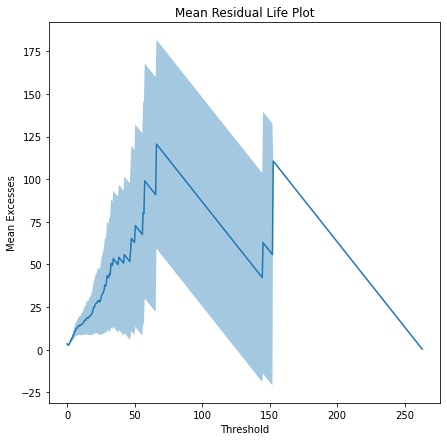

In [7]:
#Mean Residual Life plot for finding appropriate threshold value for Peak-Over-Threshold method.
ely.MRL(sample=data,alpha=0.05)

#### Mean Residual Life Plot
It takes mean of excess values above a threshold minus threshold and plot it against that threshold value. I fthe plot is linear it is fine but if it losses stability then choose that value as the threshold.

In the above plot, the plot starts losing the stability from around 10 itself, so we are taking 10 as the threshold.

#### Peaks-Over-Threshold method

,Date,Loss
index,,
15,1980-01-26,11.374817
17,1980-01-28,26.214641
22,1980-02-13,14.122076
24,1980-02-19,11.713031
28,1980-02-23,12.465593
...,...,...
2105,1990-09-08,14.851485
2121,1990-10-08,144.657591
2122,1990-10-10,28.630363


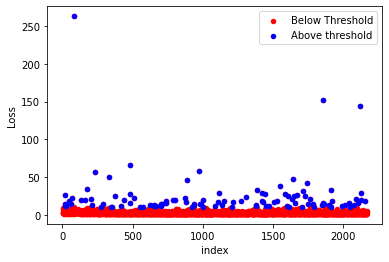

In [8]:
#Getting large claims using POT method using threshold value as 30.
pot=ely.getPOT(sample=data,threshold=10)
pot

In the above table, we obtained all the values above the threshold = 10 as extreme values. The plot shows the extreme values in blue and non-extreme values in red.

#### GPD Fit

In [9]:
#Fitting GPD with large claims obtained using POT method.
gpdfit=ely.gpdfit(sample=data,threshold=10)

#Getting estimated distribution parameters for GPD fit.
ely.gpdparams(fit=gpdfit)

Shape: 0.49697630118112623
Scale: 6.9754506314014675


We are using two parameterized GPD. The parameters are estimated. 

## Plots

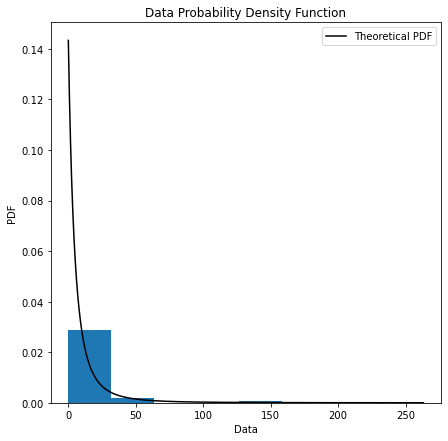

In [15]:
#Data Probability Density Function plot.
ely.gpdpdf(sample=data,threshold=10,bin_method="sturges",alpha=0.5)

#### Probability density function plot
The above plot gives the corresponding probabilities of the losses.

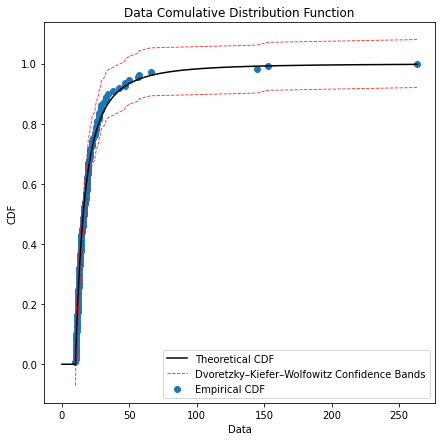

In [14]:
#Cumulative Density Function plot.
ely.gpdcdf(sample=data,threshold=10,alpha=0.5)

#### Cumulative Distribution Function plot
The cumulative distribution function (CDF) of a random variable evaluated at x, is the probability that x will take a value less than or equal to x. 

#### Dvoretzky–Kiefer–Wolfowitz confidence bands
It explains how close an empirically determined distribution function will be to the distribution function from which the empirical samples are drawn.

In the above plot we can see that the model cdf points almost exactly allign with the theoritical cdf line. Moreover, the bands are also closer to the points.

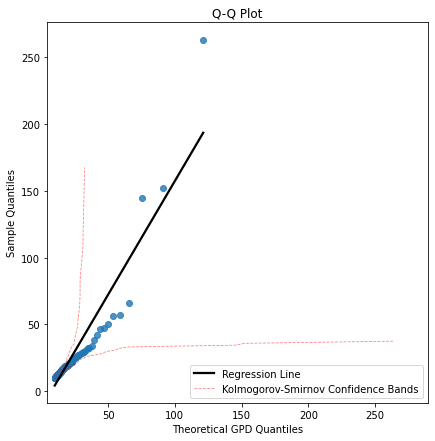

In [19]:
#Quantile-Quantile plot.
ely.gpdqqplot(sample=data,threshold=10,alpha=0.5)

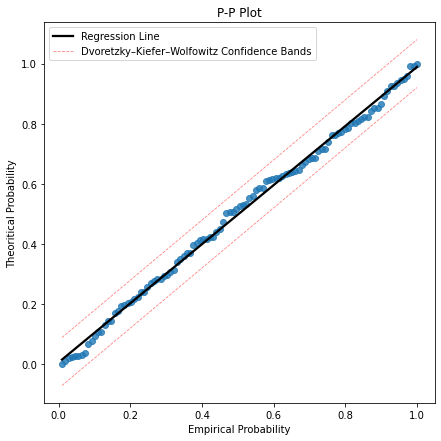

In [10]:
#Probability-Probaility plot.
ely.gpdppplot(sample=data,threshold=10,alpha=0.5)

#### PPplot
From the above PPplot we can conclude that the empirical probabilities follow an exponential distribution as they almost exactly allign with the theoritical probabilities. Moreover, the confidence bands are very close to the probabilities.

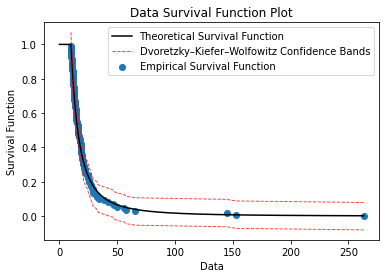

In [23]:
#Survival Function
ely.survivalFunction(sample=data,threshold=10,alpha=0.5)

#### Survival Function
It is a function that gives the probability that a patient, device, or other object of interest will survive past a certain time.

The above survival functon plot can be interpreted like - as the value of extreme value increases the probability of them occuring decreases. For the extr